# MidSSL's and MidSSR's x,y vs time for gait data
Richard Sowers r-sowers@illinois.edu https://publish.illinois.edu/r-sowers/ Copyright 2018 University of Illinois Board of Trustees. All Rights Reserved. Licensed under the MIT license

In [1]:
#Author Zhonghao(Dennis) Zhao
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
import sklearn
from sklearn.svm import SVC

In [2]:
# Read, clean, and sort data files
# Use dataset of health people[300-307] as trainning data.
''' return value of this chunk
    time_array: [0,74], all our data's collected time is between [0,74] 
    xlaverage_array: length 75, every index in this array correponding to a sepcific "index amount" of time
                              the value of  xlaverage_array[i] is the average MidSSL x value for all the healthy people data 
                              collected from time [i,i+1)
                              
    ylaverage_array: length 75, every index in this array correponding to a sepcific "index amount" of time
                              the value of  xlaverage_array[i] is the average MidSSL y value for all the healthy people data 
                              collected from time [i,i+1)
    
    xRaverage_array: length 75, every index in this array correponding to a sepcific "index amount" of time
                              the value of  xlaverage_array[i] is the average MidSSR x value for all the healthy people data 
                              collected from time [i,i+1)
    
    ylaverage_array: length 75, every index in this array correponding to a sepcific "index amount" of time
                              the value of  xlaverage_array[i] is the average MidSSR y value for all the healthy people data 
                              collected from time [i,i+1)
''' 

health_exp_number = [300,301,302,303,304,305,306,307]
health_trail_number = [1,2]
time_array = np.linspace(0,74,num = 75) # chose 74 because max time is between 73 and 74
countl_array = np.zeros(75)
countR_array = np.zeros(75)
xlaverage_array = np.zeros(75)
ylaverage_array = np.zeros(75)
xRaverage_array = np.zeros(75)
yRaverage_array = np.zeros(75)


#calculate how many data(rows) in total do we have for MidSSL and MidSSR
# left_counter: total number of MidSSL data
# eight_counter: total number of MidSSR data
left_counter = 0
right_counter = 0
for exp_n in health_exp_number:
    for trail_n in health_trail_number:
        dataset = pd.read_csv(str(exp_n)+"_B3_TRIAL0"+str(trail_n)+"_GAITCYCLES.csv")
        valid_data = dataset[dataset.Valid == True] #use valid == true data only
        Midl_data = valid_data[valid_data.EventType == "MidSSL"] # Get all midssl data
        Midr_data = valid_data[valid_data.EventType == "MidSSR"] # Get all midssr data
        Midl_xList = [element.X for element in Midl_data.itertuples()]
        left_counter += len(Midl_xList)
        Midr_xList = [element.X for element in Midr_data.itertuples()]
        right_counter += len(Midl_xList)

'''
  final_xl_h, final_yl_h, final_timel_h, consists of all the exact value of time, x, y pairs for MidSSL data,
  every pair of value share the same index, e.g. final_xl_h[1], final_yl_h[1], final_timel_h[1]
  
  final_xR_h, final_yR_h, final_timeR_h, consists of all the exact value of time, x, y pairs for MidSSR data,
  every pair of value share the same index, e.g. final_xR_h[1], final_yR_h[1], final_timeR_h[1]
'''        
final_xl_h = np.zeros(left_counter)   #all length are equal
final_yl_h = np.zeros(left_counter)
final_timel_h = np.zeros(left_counter)

final_xR_h = np.zeros(right_counter)   #all length are equal
final_yR_h = np.zeros(right_counter)
final_timeR_h = np.zeros(right_counter)

total_index = 0
for exp_n in health_exp_number:
    for trail_n in health_trail_number:
        dataset = pd.read_csv(str(exp_n)+"_B3_TRIAL0"+str(trail_n)+"_GAITCYCLES.csv")
        valid_data = dataset[dataset.Valid == True] #use valid == true data only
        Midl_data = valid_data[valid_data.EventType == "MidSSL"] # Get all midssl data
        Midr_data = valid_data[valid_data.EventType == "MidSSR"] # Get all midssr data
        index = total_index
        for element in Midl_data.itertuples():
            final_xl_h[index] = element.X
            final_yl_h[index] = element.Y
            final_timel_h[index] = element.Time
            index += 1
            time = int(element.Time)
            xlaverage_array[time] += element.X
            ylaverage_array[time] += element.Y
            countl_array[time] += 1;
            
            
            
        index = total_index
        for element in Midr_data.itertuples():
            final_xR_h[index] = element.X
            final_yR_h[index] = element.Y
            final_timeR_h[index] = element.Time
            index += 1
            time = int(element.Time)
            xRaverage_array[time] += element.X
            yRaverage_array[time] += element.Y
            countR_array[time] += 1;
        
        total_index = index
        
for i in range(75):
    if(countl_array[i] != 0):
        xlaverage_array[i] = xlaverage_array[i] / countl_array[i]
        ylaverage_array[i] = ylaverage_array[i] / countl_array[i]
    
    if(countR_array[i] != 0):
        xRaverage_array[i] = xRaverage_array[i] / countR_array[i]
        yRaverage_array[i] = yRaverage_array[i] / countR_array[i]


In [3]:
# Read, clean, and sort data files
# Use dataset of health patient[200-210 as trainning data
''' return value of this chunk
    time_array: [0,74], all our data's collected time is between [0,74] 
    xlaverage_array_p: length 75, every index in this array correponding to a sepcific "index amount" of time
                              the value of  xlaverage_array[i] is the average MidSSL x value for all the patient data 
                              collected from time [i,i+1)
                              
    ylaverage_array_p: length 75, every index in this array correponding to a sepcific "index amount" of time
                              the value of  xlaverage_array[i] is the average MidSSL y value for all the patient data 
                              collected from time [i,i+1)
    
    xRaverage_array_p: length 75, every index in this array correponding to a sepcific "index amount" of time
                              the value of  xlaverage_array[i] is the average MidSSR x value for all the patient data 
                              collected from time [i,i+1)
    
    ylaverage_array_p: length 75, every index in this array correponding to a sepcific "index amount" of time
                              the value of  xlaverage_array[i] is the average MidSSR y value for all the patient data 
                              collected from time [i,i+1)
''' 

patient_exp_number = list(range(200,210))
patient_trail_number = [1,2]

countl_array_p = np.zeros(75)
countR_array_p = np.zeros(75)
xlaverage_array_p = np.zeros(75)
ylaverage_array_p = np.zeros(75)
xRaverage_array_p = np.zeros(75)
yRaverage_array_p = np.zeros(75)

#calculate how many data(rows) in total do we have for MidSSL and MidSSR
# left_counter: total number of MidSSL data
# eight_counter: total number of MidSSR data
left_counter = 0
right_counter = 0
for exp_n in patient_exp_number:
    for trail_n in patient_trail_number:
        dataset = pd.read_csv(str(exp_n)+"_B3_TRIAL0"+str(trail_n)+"_GAITCYCLES.csv")
        valid_data = dataset[dataset.Valid == True] #use valid == true data only
        Midl_data = valid_data[valid_data.EventType == "MidSSL"] # Get all midssl data
        Midr_data = valid_data[valid_data.EventType == "MidSSR"] # Get all midssr data
        Midl_xList = [element.X for element in Midl_data.itertuples()]
        left_counter += len(Midl_xList)
        Midr_xList = [element.X for element in Midr_data.itertuples()]
        right_counter += len(Midl_xList)
        
'''
  final_xl_p, final_yl_p, final_timel_p, consists of all the exact value of time, x, y pairs for MidSSL data,
  every pair of value share the same index, e.g. final_xl_h[1], final_yl_h[1], final_timel_h[1]
  
  final_xR_p, final_yR_p, final_timeR_p, consists of all the exact value of time, x, y pairs for MidSSR data,
  every pair of value share the same index, e.g. final_xR_h[1], final_yR_h[1], final_timeR_h[1]
'''            
final_xl_p = np.zeros(left_counter)   #all length are equal
final_yl_p = np.zeros(left_counter)
final_timel_p = np.zeros(left_counter)

final_xR_p = np.zeros(right_counter)   #all length are equal
final_yR_p = np.zeros(right_counter)
final_timeR_p = np.zeros(right_counter)

total_index = 0
for exp_n in patient_exp_number:
    for trail_n in patient_trail_number:
        dataset = pd.read_csv(str(exp_n)+"_B3_TRIAL0"+str(trail_n)+"_GAITCYCLES.csv")
        valid_data = dataset[dataset.Valid == True] #use valid == true data only
        Midl_data = valid_data[valid_data.EventType == "MidSSL"] # Get all midssl data
        Midr_data = valid_data[valid_data.EventType == "MidSSR"] # Get all midssr data
        index = total_index
        for element in Midl_data.itertuples():
            final_xl_p[index] = element.X
            final_yl_p[index] = element.Y
            final_timel_p[index] = element.Time
            index += 1
            time = int(element.Time)
            xlaverage_array_p[time] += element.X
            ylaverage_array_p[time] += element.Y
            countl_array_p[time] += 1;
            
        index = total_index
        for element in Midr_data.itertuples():
            final_xR_p[index] = element.X
            final_yR_p[index] = element.Y
            final_timeR_p[index] = element.Time
            index += 1
            time = int(element.Time)
            xRaverage_array_p[time] += element.X
            yRaverage_array_p[time] += element.Y
            countR_array_p[time] += 1;
        
        total_index = index

for i in range(75):
    if(countl_array_p[i] != 0):
        xlaverage_array_p[i] = xlaverage_array_p[i] / countl_array_p[i]
        ylaverage_array_p[i] = ylaverage_array_p[i] / countl_array_p[i]
    
    if(countR_array_p[i] != 0):
        xRaverage_array_p[i] = xRaverage_array_p[i] / countR_array_p[i]
        yRaverage_array_p[i] = yRaverage_array_p[i] / countR_array_p[i]

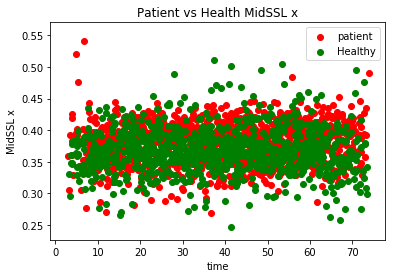

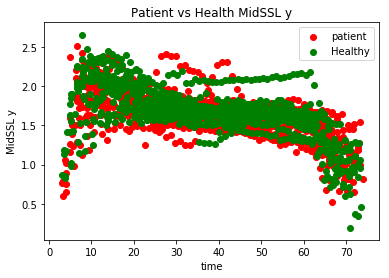

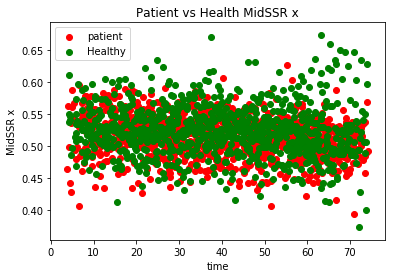

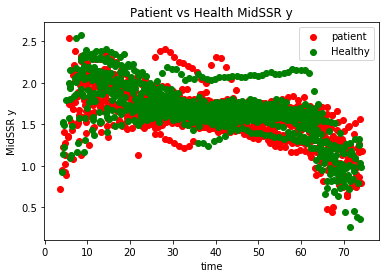

In [4]:
# plot all (time,x) or (time, y) data in the dataset, 
# here time, x, y are all real value corresponding to each row in the data
# result: I did not see a possible difference between patient and healthy people,
# so I plot average x, y value in the following chunk

p1 = plt.scatter(final_timel_p,final_xl_p, color = 'red') # choose the time interval where y value differ most.
p2 = plt.scatter(final_timel_h,final_xl_h, color = 'green')
plt.title("Patient vs Health MidSSL x")
plt.xlabel("time")
plt.ylabel("MidSSL x")
plt.legend((p1,p2), ("patient", "Healthy"))
plt.show()

p1 = plt.scatter(final_timel_p,final_yl_p, color = 'red') # choose the time interval where y value differ most.
p2 = plt.scatter(final_timel_h,final_yl_h, color = 'green')
plt.title("Patient vs Health MidSSL y")
plt.xlabel("time")
plt.ylabel("MidSSL y")
plt.legend((p1,p2), ("patient", "Healthy"))
plt.show()

p1 = plt.scatter(final_timeR_p,final_xR_p, color = 'red') # choose the time interval where y value differ most.
p2 = plt.scatter(final_timeR_h,final_xR_h, color = 'green')
plt.title("Patient vs Health MidSSR x")
plt.xlabel("time")
plt.ylabel("MidSSR x")
plt.legend((p1,p2), ("patient", "Healthy"))
plt.show()

p1 = plt.scatter(final_timeR_p,final_yR_p, color = 'red') # choose the time interval where y value differ most.
p2 = plt.scatter(final_timeR_h,final_yR_h, color = 'green')
plt.title("Patient vs Health MidSSR y")
plt.xlabel("time")
plt.ylabel("MidSSR y")
plt.legend((p1,p2), ("patient", "Healthy"))
plt.show()

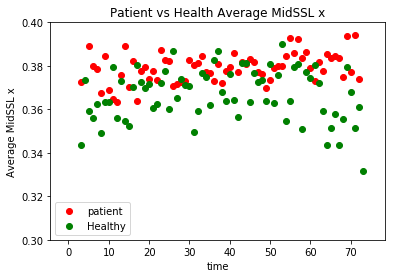

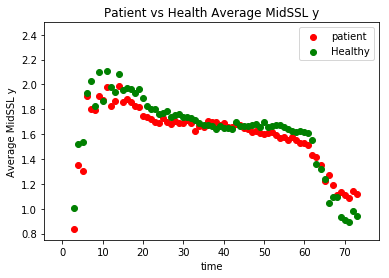

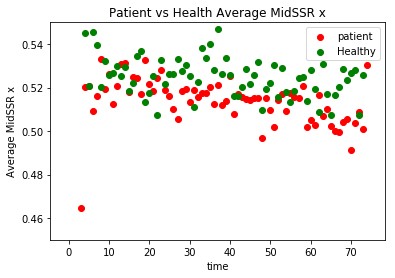

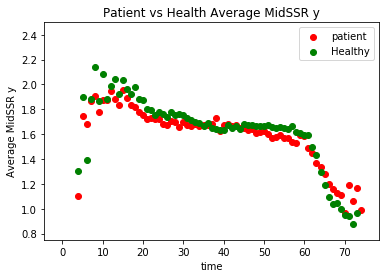

In [5]:
# plot all (time,average_x) or (time, average_y) data in the dataset
# Patient vs Health Average MidSSR x seems to show the clearest difference and I will test SVM later.

p1 = plt.scatter(time_array,xlaverage_array_p, color = 'red') # choose the time interval where y value differ most.
p2 = plt.scatter(time_array,xlaverage_array, color = 'green')
plt.ylim(0.3,0.4)
plt.title("Patient vs Health Average MidSSL x")
plt.xlabel("time")
plt.ylabel("Average MidSSL x")
plt.legend((p1,p2), ("patient", "Healthy"))
plt.show()

p1 = plt.scatter(time_array,ylaverage_array_p, color = 'red') # choose the time interval where y value differ most.
p2 = plt.scatter(time_array,ylaverage_array, color = 'green')
plt.ylim(0.75,2.5)
plt.title("Patient vs Health Average MidSSL y")
plt.xlabel("time")
plt.ylabel("Average MidSSL y")
plt.legend((p1,p2), ("patient", "Healthy"))
plt.show()

p1 = plt.scatter(time_array,xRaverage_array_p, color = 'red') # choose the time interval where y value differ most.
p2 = plt.scatter(time_array,xRaverage_array, color = 'green')
plt.ylim(0.45,0.55)
plt.title("Patient vs Health Average MidSSR x")
plt.xlabel("time")
plt.ylabel("Average MidSSR x")
plt.legend((p1,p2), ("patient", "Healthy"))
plt.show()

p1 = plt.scatter(time_array,yRaverage_array_p, color = 'red') # choose the time interval where y value differ most.
p2 = plt.scatter(time_array,yRaverage_array, color = 'green')
plt.ylim(0.75,2.5)
plt.title("Patient vs Health Average MidSSR y")
plt.xlabel("time")
plt.ylabel("Average MidSSR y")
plt.legend((p1,p2), ("patient", "Healthy"))
plt.show()

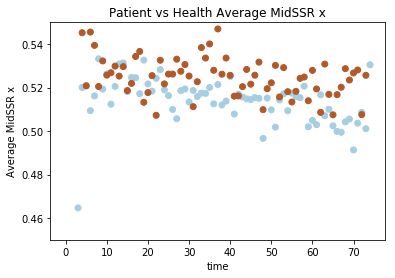

In [6]:
'''
reorganize data in the following format:
for any patient: [time, x], 0
for any healthy: [time, x], 1
'''
X = []
Y = []
for i in range(len(time_array)):
    X.append([time_array[i],xRaverage_array_p[i]])
    Y.append(0)
for i in range(len(time_array)):
    X.append([time_array[i],xRaverage_array[i]])
    Y.append(1)
X = np.asarray(X)
# fit the model
clf = SVC(kernel='linear',C=5000)
clf.fit(X, Y)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.title("Patient vs Health Average MidSSR x")
plt.xlabel("time")
plt.ylabel("Average MidSSR x")
plt.ylim(0.45,0.55)

plt.show()

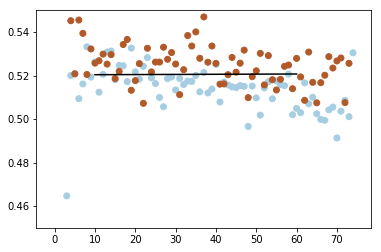

x =  6.4197593395777696e-06 * t -  -0.5203458122365223
if x < x', it is patient, else, it is healthy


In [7]:
# get the separating hyperplane
w = clf.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(10,60)
yy = a * xx - (clf.intercept_[0]) / w[1]

# plot the parallels to the separating hyperplane that pass through the
# support vectors
b = clf.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clf.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

# plot the line, the points, and the nearest vectors to the plane
plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=80, facecolors='none')
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.ylim(0.45,0.55)
plt.show()

#show the parameters for the SVM result and how we classfy points based on the result
print("x = ", a , "* t - ", (clf.intercept_[0]) / w[1])
print("if x < x', it is patient, else, it is healthy")

### test data health[308-323]
### patient 
### did the complete same thing above to obtain xRaverage_array and xRaverage_array_p

In [8]:
# Read, clean, and sort data files
# list for all types strides' mean and std, will be update on each set of data for all health people

health_exp_number = [308,309,310,311,312,313,314,318,320,321,322,323]
health_trail_number = [1,2]
time_array = np.linspace(0,74,num = 75) # chose 74 because max time is between 73 and 74
countR_array = np.zeros(75)
xRaverage_array = np.zeros(75)


for exp_n in health_exp_number:
    for trail_n in health_trail_number:
        dataset = pd.read_csv(str(exp_n)+"_B3_TRIAL0"+str(trail_n)+"_GAITCYCLES.csv")
        valid_data = dataset[dataset.Valid == True] #use valid == true data only
        Midr_data = valid_data[valid_data.EventType == "MidSSR"] # Get all midssr data
        for element in Midr_data.itertuples():
            time = int(element.Time)
            xRaverage_array[time] += element.X
            countR_array[time] += 1;
        
        
        
for i in range(75):
    if(countR_array[i] != 0):
        xRaverage_array[i] = xRaverage_array[i] / countR_array[i]


In [9]:
# Read, clean, and sort data files
# list for all types strides' mean and std, will be update on each set of data for all patient

patient_exp_number = list(range(210,220))
patient_trail_number = [1,2]

time_array = np.linspace(0,74,num = 75) # chose 74 because max time is between 73 and 74
countR_array_p = np.zeros(75)
xRaverage_array_p = np.zeros(75)

for exp_n in patient_exp_number:
    for trail_n in patient_trail_number:
        dataset = pd.read_csv(str(exp_n)+"_B3_TRIAL0"+str(trail_n)+"_GAITCYCLES.csv")
        valid_data = dataset[dataset.Valid == True] #use valid == true data only
        Midr_data = valid_data[valid_data.EventType == "MidSSR"] # Get all midssr data
      
        for element in Midr_data.itertuples():
            time = int(element.Time)
            xRaverage_array_p[time] += element.X
            countR_array_p[time] += 1
            

for i in range(75):
    if(countR_array_p[i] != 0):
        xRaverage_array_p[i] = xRaverage_array_p[i] / countR_array_p[i]

In [10]:
X = []
Y = []
for i in range(len(time_array)):
    X.append([time_array[i],xRaverage_array_p[i]])
    Y.append(0)
for i in range(len(time_array)):
    X.append([time_array[i],xRaverage_array[i]])
    Y.append(1)


In [11]:
Y_predict = []
intercept = (clf.intercept_[0]) / w[1]
for i in range(len(time_array)):
    t = time_array[i]
    x = xRaverage_array_p[i]
    expect = a*t - intercept
    if(x < expect):
        Y_predict.append(0)
    else:
        Y_predict.append(1)

for i in range(len(time_array)):
    t = time_array[i]
    x = xRaverage_array[i]
    expect = a*t + intercept
    if(x < expect):
        Y_predict.append(0)
    else:
        Y_predict.append(1)   


In [12]:
correct = 0
for i in range(len(Y)):
    if(Y[i] == Y_predict[i]):
        correct += 1

accuracy = correct / len(Y)
print(accuracy)

0.98
